In [5]:
# import necesarry modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [7]:
# import the dataset
breast_cancer = pd.read_csv('./breast_cancer.csv')
breast_cancer.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [9]:
# information of the dataset
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

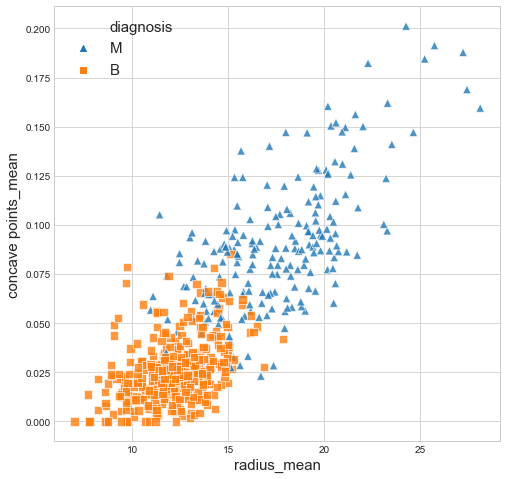

In [11]:
# plot breast cancer dataset in 2D
plt.figure(figsize = [8, 8])
sns.scatterplot(x = 'radius_mean',
                y = 'concave points_mean',
                data = breast_cancer,
                hue = 'diagnosis',
                style = 'diagnosis',
                markers = ["^", "s"],
                alpha = 0.8,
                s = 70)
plt.xlabel('radius_mean', size = 15)
plt.ylabel('concave points_mean', size = 15)
plt.legend(loc = 'upper left',
           fontsize = 15)

plt.show()

In [13]:
# Create feature and target arrays
X = breast_cancer[['concave points_mean', 'radius_mean']]
y = breast_cancer[['diagnosis']]
data = [X, y]
data[0].head()

concave points_mean  radius_mean
0              0.14710        17.99
1              0.07017        20.57
2              0.12790        19.69
3              0.10520        11.42
4              0.10430        20.29

Decision Tree

In [15]:
# classification-tree in scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# splot dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 1)

# instantiate dt
dt = DecisionTreeClassifier(max_depth = 2, random_state = 1)

In [17]:
# fit dt to the training set
dt.fit(X_train, y_train)

# predict test set labels
y_pred_dt = dt.predict(X_test)

# evaluate test-set accuracy
acc = accuracy_score(y_test, y_pred_dt)
print('Test set accuracy (Decision Tree): {:.3f}'.format(acc))

Test set accuracy (Decision Tree): 0.904


Logistic Regression

In [19]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# predict test set labels
y_pred_logreg = logreg.predict(X_test)

# evaluate test-set accuracy
acc = accuracy_score(y_test, y_pred_logreg)
print('Test set accuracy (Logistic Regression): {:.3f}'.format(acc))

Test set accuracy (Logistic Regression): 0.886


Decision Tree (criterion : gini index, entropy)

In [21]:
# classification-tree in scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# splot dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 1)

# instantiate dt
dt_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, random_state = 1)

In [23]:
# fit dt to the training set
dt_gini.fit(X_train, y_train)

# predict test set labels
y_pred_dt_gini = dt_gini.predict(X_test)

# evaluate accuracy_gini
accuracy_gini = accuracy_score(y_test, y_pred_dt_gini)

In [25]:
# classification-tree in scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# splot dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 1)

# instantiate dt
dt_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, random_state = 1)

In [27]:
# fit dt to the training set
dt_entropy.fit(X_train, y_train)

# predict test set labels
y_pred_dt_entropy = dt_entropy.predict(X_test)

# evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred_dt_entropy)

In [29]:
# print accuracy_entropy
print('Accuracy achieved by using entropy: {:.3f}'.format(accuracy_entropy))

# print accuracy_gini
print('Accuracy achieved by using the gini index: {:.3f}'.format(accuracy_gini))

Accuracy achieved by using entropy: 0.883
Accuracy achieved by using the gini index: 0.886


Ensemble Learning

In [31]:
# import functions to compute accuracy and split data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# import models, including VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

In [33]:
# split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 1)

# instantiate individual classifiers
lr = LogisticRegression(random_state = 1)
knn = KNN(n_neighbors = 3)
dt = DecisionTreeClassifier(random_state = 1)

# define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
               ('K Nearest Neighbours', knn),
               ('Classification Tree', dt)]


In [35]:
# iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers :
    # fit clf to the training set
    clf.fit(X_train, y_train)

    # predict the labels of the test set
    y_pred = clf.predict(X_test)

    # evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Logistic Regression : 0.848
K Nearest Neighbours : 0.860
Classification Tree : 0.883


In [37]:
# instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators = classifiers)

# fit vc to the training set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

# evaluate the test-set accuracy of vc
print('Voting Classifier: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Voting Classifier: 0.889


Bagging

In [39]:
# import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 1)

In [40]:
# instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth = 4,
                            min_samples_leaf = 0.16,
                            random_state = 1)

# instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator = dt,
                       n_estimators = 300,
                       n_jobs = -1)

# fit bc to the training set
bc.fit(X_train, y_train)

# predict test set labels
y_pred = bc.predict(X_test)

# evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.877


Out of Bag Evaluation (OOB Evaluation)

In [41]:
# import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 1)

In [42]:
# instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth = 4,
                            min_samples_leaf = 0.16,
                            random_state = 1)

# instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator = dt,
                       n_estimators = 300,
                       oob_score = True,
                       n_jobs = -1)

# fit bc to the training set
bc.fit(X_train, y_train)

# predict test set labels
y_pred = bc.predict(X_test)

# evaluate and print test-set accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# extract the OOB accuracy from bc
oob_accuracy = bc.oob_score_

# print test set accuracy
print('Test set accuracy: {:.3f}'.format(test_accuracy))

# print OOB accuracy
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

Test set accuracy: 0.877
OOB accuracy: 0.915


AdaBoost

In [43]:
# import models and utility functions
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 1)

In [45]:
# instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth = 1,
                            random_state = 3)

# instantiate an AdaBoost classifier 'adb_clf'
adb_clf = AdaBoostClassifier(base_estimator = dt,
                             n_estimators = 100)

# fit adb_clf to the training set
adb_clf.fit(X_train, y_train)

# predict the test set probabilities of positive class
y_pred_proba = adb_clf.predict_proba(X_test)[:, 1]

# evaluate test-set roc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

# print adb_clf_roc_auc_score
print('ROC AUC score: {:.3f}'.format(adb_clf_roc_auc_score))

ROC AUCC score: 0.958


Hyperparameter Tuning

In [58]:
# classification-tree in scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# splot dataset into 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 1)


# instantiate a DecisionTreeClassifier 'dt'
dt = DecisionTreeClassifier(random_state = 1)

# print out 'dt's hyperparameters
print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 1, 'splitter': 'best'}


In [59]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

# define the grid of hyperparameters 'params_dt'
params_dt = {
             'max_depth' : [3, 4, 5, 6],
             'min_samples_leaf' : [0.04, 0.06, 0.08],
             'max_features' : [0.2, 0.4, 0.6, 0.8]
            }

# instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator = dt,
                       param_grid = params_dt,
                       scoring = 'accuracy',
                       cv = 10,
                       n_jobs = -1)

# fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)

# extract best hyperparameters from grid_dt
best_hyperparams = grid_dt.best_params_
print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'max_depth': 3, 'max_features': 0.2, 'min_samples_leaf': 0.04}


In [60]:
# extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print('Best CV accuracy: {:.3f}'.format(best_CV_score))

Best CV accuracy: 0.927


In [61]:
# extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_

# evaluate test set accuracy
test_acc = best_model.score(X_test, y_test)

# print test set accuracy
print('Test set accuracy of best model: {:.3f}'.format(test_acc))

Test set accuracy of best model: 0.901
